<a href="https://colab.research.google.com/github/manki8908/firstcompany/blob/master/15_%EC%BB%A4%ED%94%BC%EC%A7%80%EC%88%98_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!sudo apt-get install -y fonts-nanum  # 나눔폰트
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
draw_dir = '/content/drive/MyDrive/2023 직업훈련_AI/실습데이터/지도데이터'
sys.path.insert(0, draw_dir)
from draw_map import drawKorea

In [6]:
df = pd.read_csv('/content/drive/MyDrive/2023 직업훈련_AI/실습데이터/커피지수.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,가평,9,2,0,0,0.222222
1,강릉,17,4,0,2,0.210526
2,강진,1,0,0,0,0.000000
3,거제,9,6,0,0,0.666667
4,거창,1,0,0,1,0.000000
...,...,...,...,...,...,...
232,홍천,3,2,0,1,0.500000
233,화성,28,19,5,17,0.533333
234,화순,1,0,0,1,0.000000
235,화천,1,0,0,2,0.000000


In [7]:
# map 로드 및 형변환
map_raw = pd.read_excel('/content/drive/MyDrive/2023 직업훈련_AI/실습데이터/지도데이터/draw_korea_raw(2021).xlsx')
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.head()

# level_0: x, level_1: y

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [8]:
# 컬럼 리네임
map.columns = ['y', 'x', 'ID']
map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       250 non-null    int64 
 1   x       250 non-null    int64 
 2   ID      250 non-null    object
dtypes: int64(2), object(1)
memory usage: 6.0+ KB


In [9]:
# 커피지수 merge
df1 = pd.merge(map, df, how='left')
df1

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,2.0,0.0,0.0,0.0,0.000000
1,0,8,화천,1.0,0.0,0.0,2.0,0.000000
2,0,9,양구,1.0,0.0,0.0,0.0,0.000000
3,0,10,고성(강원),NaN,NaN,NaN,NaN,NaN
4,1,3,양주,16.0,7.0,0.0,2.0,0.388889
...,...,...,...,...,...,...,...,...
245,24,2,장흥,1.0,0.0,0.0,0.0,0.000000
246,24,3,보성,NaN,NaN,NaN,NaN,NaN
247,25,2,완도,1.0,0.0,0.0,0.0,0.000000
248,25,5,제주,11.0,15.0,2.0,10.0,0.809524


In [10]:
# 결측 0으로 대체
df1.fillna(value=0, inplace=True)
df1

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,2.0,0.0,0.0,0.0,0.000000
1,0,8,화천,1.0,0.0,0.0,2.0,0.000000
2,0,9,양구,1.0,0.0,0.0,0.0,0.000000
3,0,10,고성(강원),0.0,0.0,0.0,0.0,0.000000
4,1,3,양주,16.0,7.0,0.0,2.0,0.388889
...,...,...,...,...,...,...,...,...
245,24,2,장흥,1.0,0.0,0.0,0.0,0.000000
246,24,3,보성,0.0,0.0,0.0,0.0,0.000000
247,25,2,완도,1.0,0.0,0.0,0.0,0.000000
248,25,5,제주,11.0,15.0,2.0,10.0,0.809524


In [15]:
df1.이디야 = df1.이디야.astype(int)
df1.스타벅스= df1.스타벅스.astype(int)
df1.커피빈 = df1.커피빈.astype(int)
df1.빽다방 = df1.빽다방.astype(int)
df1.커피지수 = df1.커피지수.round(2)
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       250 non-null    int64  
 1   x       250 non-null    int64  
 2   ID      250 non-null    object 
 3   이디야     250 non-null    int64  
 4   스타벅스    250 non-null    int64  
 5   커피빈     250 non-null    int64  
 6   빽다방     250 non-null    int64  
 7   커피지수    250 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 17.6+ KB


,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,2,0,0,0,0.00
1,0,8,화천,1,0,0,2,0.00
2,0,9,양구,1,0,0,0,0.00
3,0,10,고성(강원),0,0,0,0,0.00
4,1,3,양주,16,7,0,2,0.39
...,...,...,...,...,...,...,...,...
245,24,2,장흥,1,0,0,0,0.00
246,24,3,보성,0,0,0,0,0.00
247,25,2,완도,1,0,0,0,0.00
248,25,5,제주,11,15,2,10,0.81


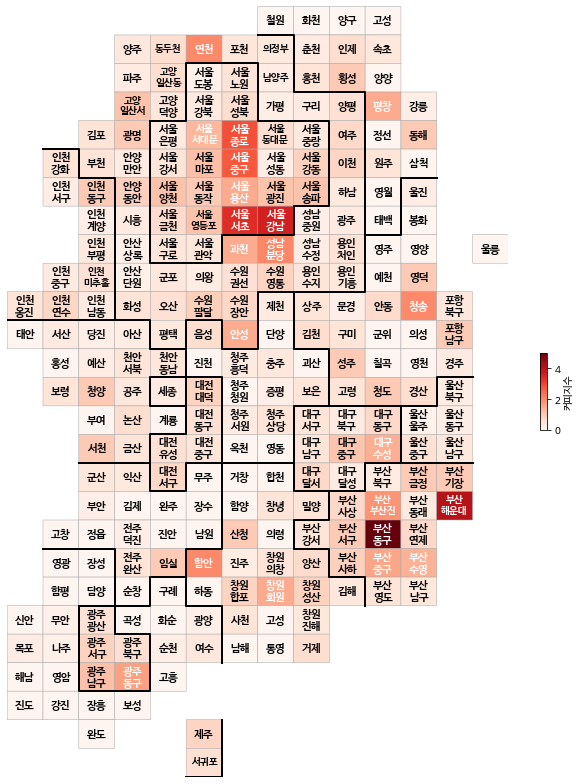

In [16]:
# 커피지수로 카토그램 그리기
drawKorea('커피지수',df1,'Reds')

In [17]:
df1.sort_values(by='커피지수', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
196,18,10,부산 동구,1,4,1,0,5.00
186,17,12,부산 해운대,7,33,4,2,4.11
66,7,7,서울 강남,23,76,40,9,3.62
65,7,6,서울 서초,14,38,23,4,3.39
33,4,6,서울 종로,11,27,13,3,2.86
